In [146]:
import os
import numpy as np
import pandas as pd
import cv2

from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from skimage.metrics import structural_similarity as ssim
import tensorflow as tf

In [147]:
df_img_info = pd.read_csv('img_info.csv')
df_sal_info = pd.read_csv('sal_info.csv')

Traitement

In [148]:
# pour les images
# Groupe by par Model 
model_img = df_img_info.groupby(df_img_info.Model)
img_MV2 = model_img.get_group('MobileNetV2')
img_VGG16 = model_img.get_group('VGG16')
img_ResNet = model_img.get_group('ResNet152V2')

# Groupe by par attaque sur les modèles
attaque_img_MV2 = img_MV2.groupby(["Attaque"])
img_MV2_PGD = attaque_img_MV2.get_group('PGD')
img_MV2_FGSM = attaque_img_MV2.get_group('FGSM')

attaque_img_VGG16 = img_VGG16.groupby(["Attaque"])
img_VGG16_PGD = attaque_img_VGG16.get_group('PGD')
img_VGG16_FGSM = attaque_img_VGG16.get_group('FGSM')

attaque_img_ResNet = img_ResNet.groupby(["Attaque"])
img_ResNet_PGD = attaque_img_ResNet.get_group('PGD')
img_ResNet_FGSM = attaque_img_ResNet.get_group('FGSM')


In [149]:
# pour les saillance
# Groupe by par Model 
model_sal = df_sal_info.groupby(df_sal_info.Model)
sal_MV2 = model_sal.get_group('MobileNetV2')
sal_VGG16 = model_sal.get_group('VGG16')
sal_ResNet = model_sal.get_group('ResNet152V2')

Groupe by par attaque sur les modèles
attaque_sal_MV2 = sal_MV2.groupby(["Attaque"])
sal_MV2_PGD = attaque_sal_MV2.get_group('PGD')
sal_MV2_FGSM = attaque_sal_MV2.get_group('FGSM')

attaque_sal_VGG16 = sal_VGG16.groupby(["Attaque"])
sal_VGG16_PGD = attaque_sal_VGG16.get_group('PGD')
sal_VGG16_FGSM = attaque_sal_VGG16.get_group('FGSM')

attaque_sal_ResNet = sal_ResNet.groupby(["Attaque"])
sal_ResNet_PGD = attaque_sal_ResNet.get_group('PGD')
sal_ResNet_FGSM = attaque_sal_ResNet.get_group('FGSM')

In [ ]:
df = img_MV2_FGSM.groupby(img_MV2_FGSM.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MV2 et attaque FGSM sur les images')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(df.index.tolist(),df["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


In [ ]:
df = img_MV2_PGD.groupby(img_MV2_PGD.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MV2 et attaque PGD sur les images')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(df.index.tolist(),df["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_21292\502764299.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = img_VGG16_PGD.groupby(img_VGG16_PGD.Objet).mean()


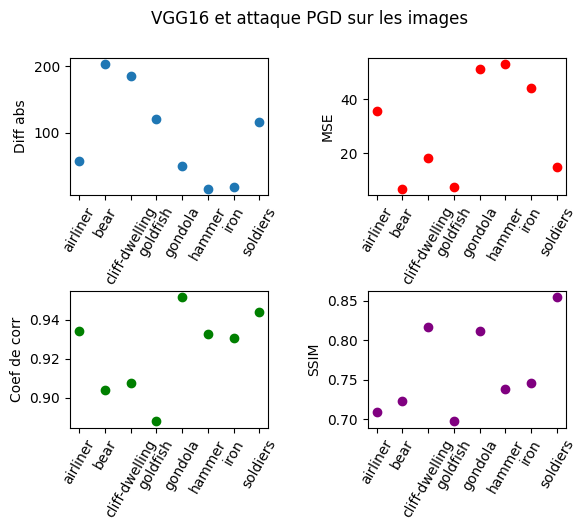

In [156]:
df = img_VGG16_PGD.groupby(img_VGG16_PGD.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('VGG16 et attaque PGD sur les images')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(df.index.tolist(),df["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


C:\Users\lucie\AppData\Local\Temp\ipykernel_21292\502764299.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = img_VGG16_PGD.groupby(img_VGG16_PGD.Objet).mean()


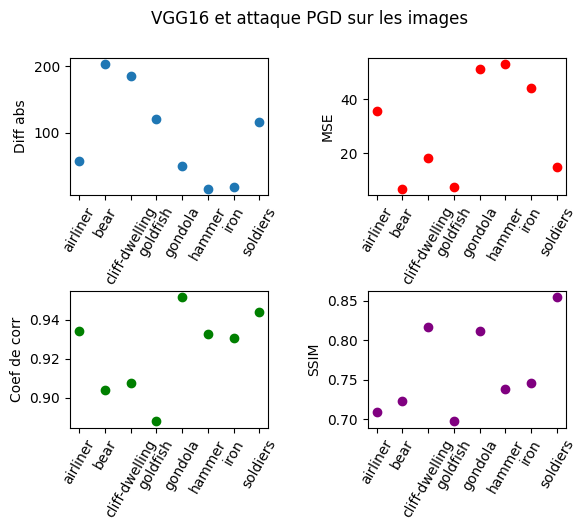

In [ ]:
df = img_VGG16_FGSM.groupby(img_VGG16_FGSM.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('VGG16 et attaque FGSM sur les images')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(df.index.tolist(),df["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


In [ ]:
df = img_ResNet_FGSM.groupby(img_ResNet_FGSM.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('ResNet et attaque FGSM sur les images')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(df.index.tolist(),df["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


In [ ]:
df = img_ResNet_PGD.groupby(img_ResNet_PGD.Objet).mean()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('ResNet et attaque PGD sur les images')
ax1.scatter(df.index.tolist(),df["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(df.index.tolist(),df["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(df.index.tolist(),df["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(df.index.tolist(),df["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


Graphiques du taux de confiance selon l'intensité de l'attaque

In [ ]:
img_VGG16_PGD['Score'] = img_VGG16_PGD['Score']/10000
img_VGG16_FGSM['Score'] = img_VGG16_FGSM['Score']/10000
img_MV2_PGD['Score'] = img_MV2_PGD['Score']/10000
img_MV2_FGSM['Score'] = img_MV2_FGSM['Score']/10000
img_ResNet_PGD['Score'] = img_ResNet_PGD['Score']/10000
img_ResNet_FGSM['Score'] = img_ResNet_FGSM['Score']/10000

In [ ]:
df_VGG16_PGD = img_VGG16_PGD.groupby(img_VGG16_PGD.Intensité).mean()
df_VGG16_FGSM = img_VGG16_FGSM.groupby(img_VGG16_FGSM.Intensité).mean()

df_MV2_PGD = img_MV2_PGD.groupby(img_MV2_PGD.Intensité).mean()
df_MV2_FGSM = img_MV2_FGSM.groupby(img_MV2_FGSM.Intensité).mean()

df_ResNet_PGD = img_ResNet_PGD.groupby(img_ResNet_PGD.Intensité).mean()
df_ResNet_FGSM = img_ResNet_FGSM.groupby(img_ResNet_FGSM.Intensité).mean()

C:\Users\lucie\AppData\Local\Temp\ipykernel_21292\236094691.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_VGG16_PGD = img_VGG16_PGD.groupby(img_VGG16_PGD.Intensité).mean()


Text(0.5, 1.0, 'VGG16 et PGD')

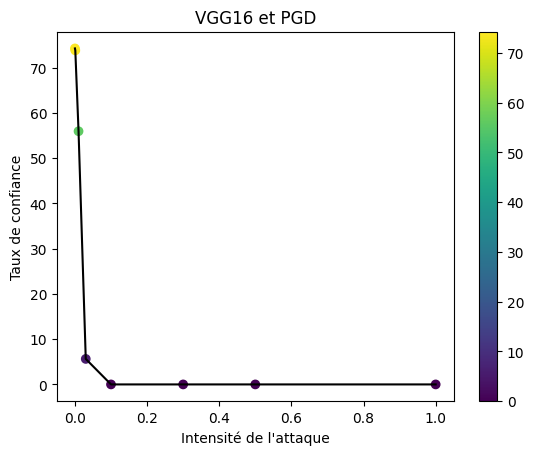

In [160]:
plt.plot(df_VGG16_PGD.index.tolist(),df_VGG16_PGD['Score'], c = 'black')
plt.scatter(df_VGG16_PGD.index.tolist(),df_VGG16_PGD['Score'],c = df_VGG16_PGD['Score'],cmap='viridis')

plt.colorbar()
plt.xlabel("Intensité de l'attaque")
plt.ylabel('Taux de confiance')
plt.title('VGG16 et PGD')

In [ ]:
plt.scatter(df_VGG16_FGSM.index.tolist(),df_VGG16_FGSM['Score'],c = df_VGG16_FGSM['Score'],cmap='viridis')
plt.colorbar()
plt.xlabel("Intensité de l'attaque")
plt.ylabel('Taux de confiance')
plt.title('VGG16 et FGSM')

In [ ]:
plt.scatter(df_MV2_PGD.index.tolist(),df_MV2_PGD['Score'],c = df_MV2_PGD['Score'],cmap='viridis')
plt.colorbar()
plt.xlabel("Intensité de l'attaque")
plt.ylabel('Taux de confiance')
plt.title('MV2 et PGD')

In [ ]:
plt.scatter(df_MV2_FGSM.index.tolist(),df_MV2_FGSM['Score'],c = df_MV2_FGSM['Score'],cmap='viridis')
plt.colorbar()
plt.xlabel("Intensité de l'attaque")
plt.ylabel('Taux de confiance')
plt.title('MV2 et FGSM')

In [ ]:
plt.scatter(df_ResNet_PGD.index.tolist(),df_ResNet_PGD['Score'],c = df_ResNet_PGD['Score'],cmap='viridis')
plt.colorbar()
plt.xlabel("Intensité de l'attaque")
plt.ylabel('Taux de confiance')
plt.title('ResNet et PGD')

In [ ]:
plt.scatter(df_ResNet_FGSM.index.tolist(),df_ResNet_FGSM['Score'],c = df_ResNet_FGSM['Score'],cmap='viridis')
plt.colorbar()
plt.xlabel("Intensité de l'attaque")
plt.ylabel('Taux de confiance')
plt.title('ResNet et FGSM')